In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Test 1 
- queue: rtx. GPU (15 cores)
- dataset: TaalSenD32
- Number of interferograms: 430
- Number of bursts: 7
- task: run_13_generate_burst_igram

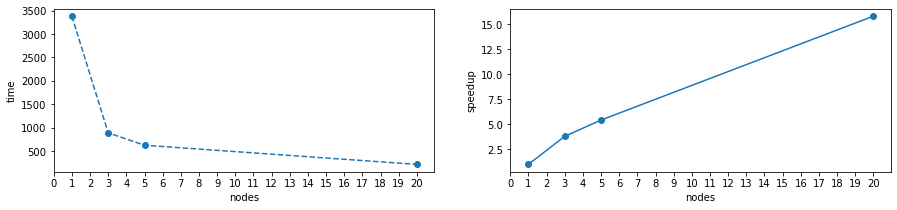

In [79]:
nodes = np.array([1,3,5,20]).astype(int)
times = np.array([3382,889,623,214]).astype(int)
speedup = [times[0]/x for x in times]

plt.figure(figsize=(15, 3))

ax1 = plt.subplot(121)
ax1.plot(nodes,times,'o--')
ax1.set_xlabel('nodes')
ax1.set_ylabel('time')
plt.xticks(np.arange(0,21, step = 1))

ax2 = plt.subplot(122)
ax2.plot(nodes,speedup,'o-')
ax2.set_xlabel('nodes')
ax2.set_ylabel('speedup')
plt.xticks(np.arange(0,21, step = 1))

plt.show()

## Test 2 
- queue: development. CPU (48 cores)
- dataset: TaalSenA142
- Number of interferograms: 420
- Number of bursts: 6
- task: run_13_generate_burst_igram

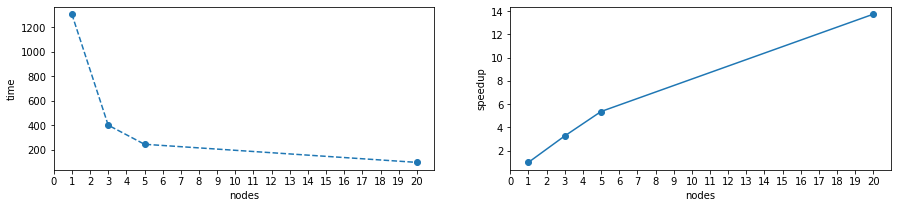

In [70]:


nodes = np.array([1,3,5,20]).astype(int)
times = np.array([1306,399,243,95]).astype(int)
speedup = [times[0]/x for x in times]

plt.figure(figsize=(15, 3))

ax1 = plt.subplot(121)
ax1.plot(nodes,times,'o--')
ax1.set_xlabel('nodes')
ax1.set_ylabel('time')
plt.xticks(np.arange(0,21, step = 1))

ax2 = plt.subplot(122)
ax2.plot(nodes,speedup,'o-')
ax2.set_xlabel('nodes')
ax2.set_ylabel('speedup')
plt.xticks(np.arange(0,21, step = 1))

plt.show()

## Test 3
 - queue: nvdimm. large memory (48 cores)
 - dataset: EquadorSenDT142
 - Number of interferograms: 486
 - Number of bursts: 34
 - task: run_13_generate_burst_igram
 - number of nodes: 4
 - Total elapsed time [sec, HH:MM:SS]: 2047 0:34:07

## Test 4
- All jobs running with different queues and nodes

`
runs :
run_01_unpack_topo_reference          
run_03_average_baseline               
run_04_extract_burst_overlaps         
run_05_overlap_geo2rdr                
run_06_overlap_resample               
run_07_pairs_misreg                   
run_08_timeseries_misreg              
run_09_fullBurst_geo2rdr              
run_10_fullBurst_resample             
run_11_extract_stack_valid_region     
run_12_merge_reference_secondary_slc  
run_13_generate_burst_igram           
run_14_merge_burst_igram              
run_15_filter_coherence               
run_16_unwrap`

1- 
  - dataset: unittestGalapagosSenDT128
  - number of bursts: 2
  - number of SLCs: 7
  - number of interferograms: 15
  - queue: rtx GPU (15 cores)
  - tasks: all
  - node = 1    -->   Total elapsed time [sec, HH:MM:SS]: 754 0:12:34
  - node = 2    -->   Total elapsed time [sec, HH:MM:SS]: 777 0:12:57
 
2-
  - dataset: EquadorSenDT142
  - Number of bursts: 34
  - Number of SLCs: 165
  - Number of interferograms: 486
  - tasks: run_13_generate_burst_igram
  - queue: nvdimm  large memory (48 cores)
  - node = 4      -->    Total elapsed time [sec, HH:MM:SS]: 2047 0:34:07
  
3-
  - dataset: TaalSenD32
  - Number of bursts: 7
  - Number of SLCs: 87
  - Number of interferograms: 420
  - queue: rtx GPU (15 cores)
  - node = 20    -->  Total elapsed time [sec, HH:MM:SS]: 3421 0:57:01
  
4-
  - dataset: TaalSenA142
  - Number of bursts: 6
  - Number of SLCs: 89
  - Number of interferograms: 430
  - queue: nvdimm large memory (48 cores)
  - node = 4     -->  Total elapsed time [sec, HH:MM:SS]: 3421 0:57:01
  
  

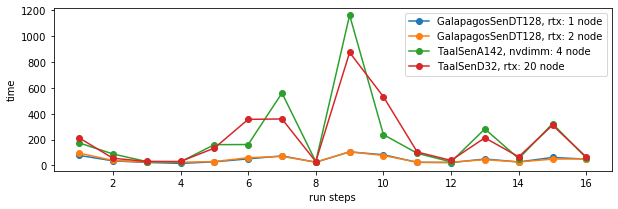

In [112]:
runs = np.ogrid[0:16] + 1
time_G_rtx_1 = [78,36,23,16,28,51,74,25,105,83,24,22,50,27,62,49]
time_G_rtx_2 = [96,39,26,25,30,60,70,26,106,77,25,25,45,27,49,51]
time_TA_nvdimm_4 = [175,89,30,28,161,162,561,29,1164,239,94,28,283,53,323,58]
time_TD_rtx_20 = [214,56,31,31,134,357,360,30,875,532,104,39,214,67,312,65]

plt.figure(figsize=(10, 3))
ax = plt.subplot(111)
ax.plot(runs, time_G_rtx_1, 'o-')
ax.plot(runs, time_G_rtx_2, 'o-')
ax.plot(runs, time_TA_nvdimm_4, 'o-')
ax.plot(runs, time_TD_rtx_20, 'o-')
ax.set_xlabel('run steps')
ax.set_ylabel('time')
ax.legend(('GalapagosSenDT128, rtx: 1 node', 'GalapagosSenDT128, rtx: 2 node', 
           'TaalSenA142, nvdimm: 4 node', 'TaalSenD32, rtx: 20 node'))

plt.show()